# Importing Libraries

In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [303]:
google_play_data = pd.read_csv('./dataset/googleplaystore.csv', index_col=0)
google_play_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


# Functions for customizing plots

In [304]:
# Function for setting style and size of plot
def set_size_style(width, height, style=None):
    plt.figure(figsize=(width, height))
    if style != None:
        sns.set_style(style)

# Function for customizating the plot
def customize_plot(plot, title:str, xlabel:str,  ylabel:str, title_font:int, label_font:int):
    plot.set_title(title, fontsize = title_font, weight='bold')
    plot.set_xlabel(xlabel, fontsize = label_font, weight='bold')
    plot.set_ylabel(ylabel, fontsize = label_font, weight='bold')

# Data Identification and Cleaning

In [305]:
google_play_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


### Parsing Data column with right format.

In [306]:
google_play_data['Last Updated'] = pd.to_datetime(google_play_data['Last Updated'], format='%d-%b-%y', errors='coerce')

In [307]:
google_play_data['Last Updated'].max()

Timestamp('2018-08-08 00:00:00')

In [308]:
google_play_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  object        
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  object        
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.2+ MB


### Formatting columns names in a same standard.

In [309]:
google_play_data.columns = google_play_data.columns.str.lower()

In [310]:
google_play_data.columns = google_play_data.columns.str.replace(" ", "_")

In [311]:
google_play_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             10841 non-null  object        
 1   category        10841 non-null  object        
 2   rating          9367 non-null   float64       
 3   reviews         10841 non-null  object        
 4   size            10841 non-null  object        
 5   installs        10841 non-null  object        
 6   type            10840 non-null  object        
 7   price           10841 non-null  object        
 8   content_rating  10840 non-null  object        
 9   genres          10841 non-null  object        
 10  last_updated    10840 non-null  datetime64[ns]
 11  current_ver     10833 non-null  object        
 12  android_ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.2+ MB


### Checking unique values in ratings.

In [312]:
google_play_data['rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

There is a outlier i.e 19, Apps are rated in range 1-5.

In [313]:
google_play_data[google_play_data['rating'] == 19]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,NaT,4.0 and up,NaN


Dropping the row with outlier rating.

In [314]:
google_play_data = google_play_data.drop(index=10472).reset_index(drop=True)
google_play_data.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


Changing reviews data type to int.

In [315]:
google_play_data['reviews'] = google_play_data['reviews'].astype(int)
google_play_data['reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

In [316]:
google_play_data.dtypes

app                       object
category                  object
rating                   float64
reviews                    int32
size                      object
installs                  object
type                      object
price                     object
content_rating            object
genres                    object
last_updated      datetime64[ns]
current_ver               object
android_ver               object
dtype: object

### Checking unique values in possible numeric columns.

In [317]:
google_play_data['size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [318]:
google_play_data['installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [319]:
google_play_data['installs'] = google_play_data['installs'].str.replace('+','')
google_play_data['installs'] = google_play_data['installs'].str.replace(',','')

In [320]:
google_play_data['installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [321]:
google_play_data['installs'] = google_play_data['installs'].astype(int)
google_play_data.rename(columns={'installs' : 'installs_plus'}, inplace=True)

In [322]:
google_play_data['price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

We can change the data type of price column into float after removing the dollar symbol.

In [323]:
google_play_data['price'] = google_play_data['price'].str.replace('$','')

In [324]:
google_play_data['price'].unique()

array(['0', '4.99 ', '3.99 ', '6.99 ', '1.49 ', '2.99 ', '7.99 ', '5.99 ',
       '3.49 ', '1.99 ', '9.99 ', '7.49 ', '0.99 ', '9.00 ', '5.49 ',
       '10.00 ', '24.99 ', '11.99 ', '79.99 ', '16.99 ', '14.99 ',
       '1.00 ', '29.99 ', '12.99 ', '2.49 ', '10.99 ', '1.50 ', '19.99 ',
       '15.99 ', '33.99 ', '74.99 ', '39.99 ', '3.95 ', '4.49 ', '1.70 ',
       '8.99 ', '2.00 ', '3.88 ', '25.99 ', '399.99 ', '17.99 ',
       '400.00 ', '3.02 ', '1.76 ', '4.84 ', '4.77 ', '1.61 ', '2.50 ',
       '1.59 ', '6.49 ', '1.29 ', '5.00 ', '13.99 ', '299.99 ', '379.99 ',
       '37.99 ', '18.99 ', '389.99 ', '19.90 ', '8.49 ', '1.75 ',
       '14.00 ', '4.85 ', '46.99 ', '109.99 ', '154.99 ', '3.08 ',
       '2.59 ', '4.80 ', '1.96 ', '19.40 ', '3.90 ', '4.59 ', '15.46 ',
       '3.04 ', '4.29 ', '2.60 ', '3.28 ', '4.60 ', '28.99 ', '2.95 ',
       '2.90 ', '1.97 ', '200.00 ', '89.99 ', '2.56 ', '30.99 ', '3.61 ',
       '394.99 ', '1.26 ', '1.20 ', '1.04 '], dtype=object)

In [325]:
google_play_data['price'] = google_play_data['price'].astype(float)
google_play_data['price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [326]:
google_play_data.dtypes

app                       object
category                  object
rating                   float64
reviews                    int32
size                      object
installs_plus              int32
type                      object
price                    float64
content_rating            object
genres                    object
last_updated      datetime64[ns]
current_ver               object
android_ver               object
dtype: object

### Handling Null Values.

In [327]:
google_play_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             10840 non-null  object        
 1   category        10840 non-null  object        
 2   rating          9366 non-null   float64       
 3   reviews         10840 non-null  int32         
 4   size            10840 non-null  object        
 5   installs_plus   10840 non-null  int32         
 6   type            10839 non-null  object        
 7   price           10840 non-null  float64       
 8   content_rating  10840 non-null  object        
 9   genres          10840 non-null  object        
 10  last_updated    10840 non-null  datetime64[ns]
 11  current_ver     10832 non-null  object        
 12  android_ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1016.4+ KB


In [328]:
google_play_data.isna().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs_plus        0
type                 1
price                0
content_rating       0
genres               0
last_updated         0
current_ver          8
android_ver          2
dtype: int64

Dataset seems okay, no need to remove null values.

Quick Summary Statistics for numeric columns.

In [329]:
google_play_data.describe()

,rating,reviews,installs_plus,price,last_updated
count,9366.000000,1.084000e+04,1.084000e+04,10840.000000,10840
mean,4.191757,4.441529e+05,1.546434e+07,1.027368,2017-11-21 06:43:02.435424256
min,1.000000,0.000000e+00,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,3.800000e+01,1.000000e+03,0.000000,2017-09-20 00:00:00
50%,4.300000,2.094000e+03,1.000000e+05,0.000000,2018-05-24 00:00:00
75%,4.500000,5.477550e+04,5.000000e+06,0.000000,2018-07-20 00:00:00
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.515219,2.927761e+06,8.502936e+07,15.949703,NaN


Quick Summary Statistics for categorical columns.

In [330]:
google_play_data.describe(include='object')

,app,category,size,type,content_rating,genres,current_ver,android_ver
count,10840,10840,10840,10839,10840,10840,10832,10838
unique,9659,33,461,2,6,119,2783,33
top,ROBLOX,FAMILY,Varies with device,Free,Everyone,Tools,Varies with device,4.1 and up
freq,9,1972,1695,10039,8714,842,1459,2451


In [331]:
google_play_data[google_play_data['app'] == 'ROBLOX']

,app,category,rating,reviews,size,installs_plus,type,price,content_rating,genres,last_updated,current_ver,android_ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


### Printing all unique values in categorical columns.

In [332]:
for column in google_play_data.describe(include='object').columns:
    print(column.upper(), google_play_data[column].nunique())
    print(google_play_data[column].unique())
    print('-'*50)

APP 9659
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
--------------------------------------------------
CATEGORY 33
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
--------------------------------------------------
SIZE 461
['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' 

In [333]:
google_play_data['category'] = google_play_data['category'].str.capitalize().str.replace("_", " ")
google_play_data['category'].unique()

array(['Art and design', 'Auto and vehicles', 'Beauty',
       'Books and reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food and drink', 'Health and fitness', 'House and home',
       'Libraries and demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel and local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video players', 'News and magazines', 'Maps and navigation'],
      dtype=object)

### Checking outliers with box plots.

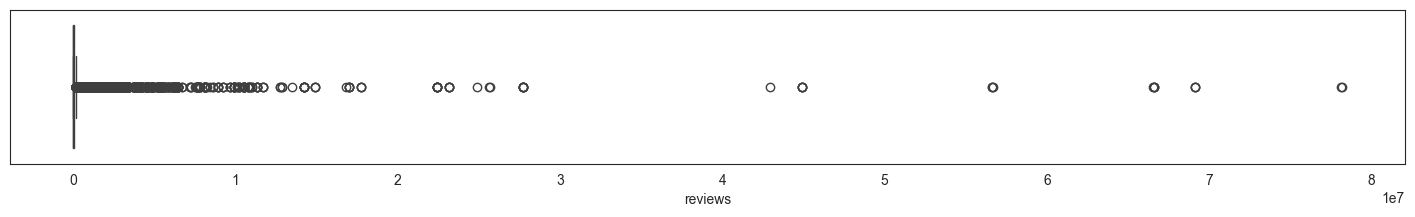

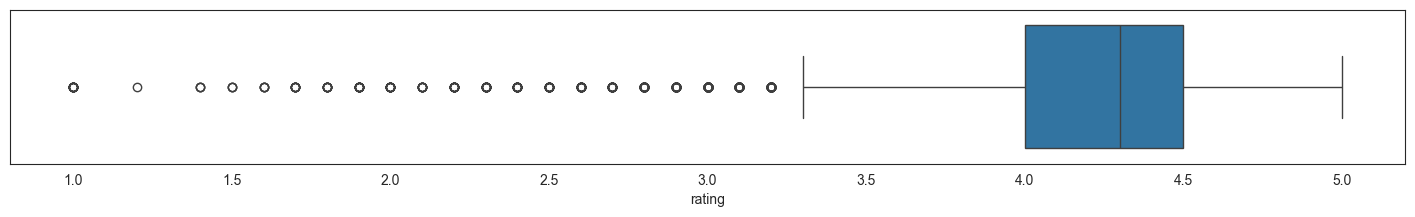

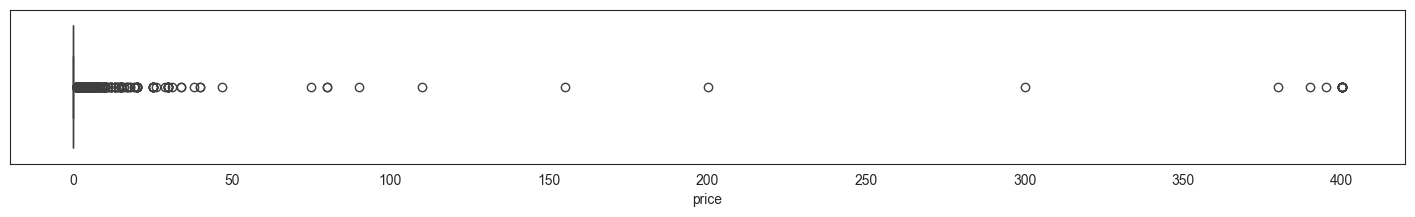

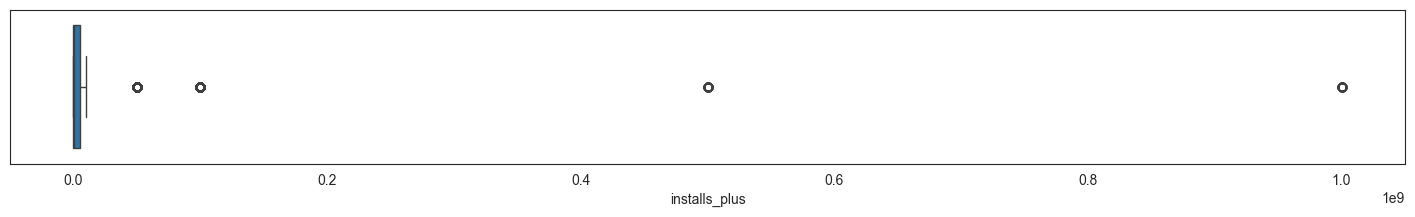

In [334]:
numeric_columns = ['reviews', 'rating', 'price', 'installs_plus']
for col in numeric_columns:
    set_size_style(18,2)
    sns.boxplot(data=google_play_data, x=col)
    plt.show()

Looking at apps with 300+ dollar price.

In [335]:
google_play_data[google_play_data['price'] > 300]

,app,category,rating,reviews,size,installs_plus,type,price,content_rating,genres,last_updated,current_ver,android_ver
4197,most expensive app (H),Family,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1,7.0 and up
4362,💎 I'm rich,Lifestyle,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,Lifestyle,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,Lifestyle,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2,4.0.3 and up
5354,I am Rich Plus,Family,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3,4.4 and up
5356,I Am Rich Premium,Finance,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up
5357,I am extremely Rich,Lifestyle,2.9,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1,4.0 and up
5358,I am Rich!,Finance,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,2017-12-11,1,4.1 and up
5359,I am rich(premium),Finance,3.5,472,965k,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up
5362,I Am Rich Pro,Family,4.4,201,2.7M,5000,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up


- These are true outliers so no need to remove them.

### Dropping duplicate rows and especially duplicates with app names.

In [336]:
google_play_data.duplicated().sum()

483

In [337]:
google_play_data.drop_duplicates(inplace=True)

In [338]:
google_play_data.duplicated(subset=['app']).sum()

698

In [339]:
google_play_data[google_play_data.duplicated(subset=['app'])]

,app,category,rating,reviews,size,installs_plus,type,price,content_rating,genres,last_updated,current_ver,android_ver
285,Quick PDF Scanner + OCR FREE,Business,4.2,80804,Varies with device,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
293,OfficeSuite : Free Office + PDF Editor,Business,4.3,1002859,35M,100000000,Free,0.0,Everyone,Business,2018-08-02,9.7.14188,4.1 and up
294,Slack,Business,4.4,51510,Varies with device,5000000,Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,Communication,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
383,imo free video calls and chat,Communication,4.3,4785988,11M,500000000,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10646,Motorola FM Radio,Video players,3.9,54815,Varies with device,100000000,Free,0.0,Everyone,Video Players & Editors,2018-05-02,Varies with device,Varies with device
10714,FarmersOnly Dating,Dating,3.0,1145,1.4M,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up
10719,Firefox Focus: The privacy browser,Communication,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up
10729,FP Notebook,Medical,4.5,410,60M,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up


In [340]:
google_play_data[google_play_data['app'] == 'FP Notebook']

,app,category,rating,reviews,size,installs_plus,type,price,content_rating,genres,last_updated,current_ver,android_ver
2379,FP Notebook,Medical,4.5,408,60M,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up
10729,FP Notebook,Medical,4.5,410,60M,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up


In [341]:
google_play_data.drop_duplicates(subset=['app'],inplace=True)

### Correlation Analysis

In [342]:
google_play_data[numeric_columns].corr()

,reviews,rating,price,installs_plus
reviews,1.000000,0.055081,-0.007598,0.625165
rating,0.055081,1.000000,-0.021199,0.040143
price,-0.007598,-0.021199,1.000000,-0.009405
installs_plus,0.625165,0.040143,-0.009405,1.000000


In [343]:
# sns.pairplot(google_play_data)

No significant correlation between variables!

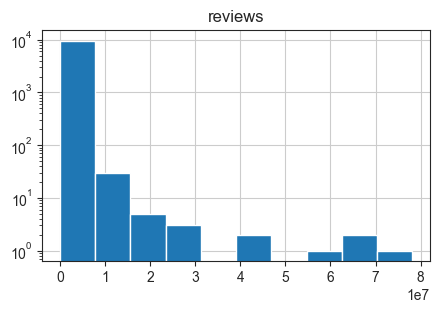

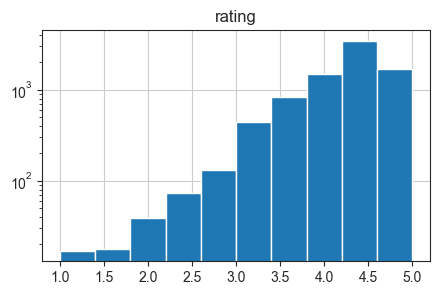

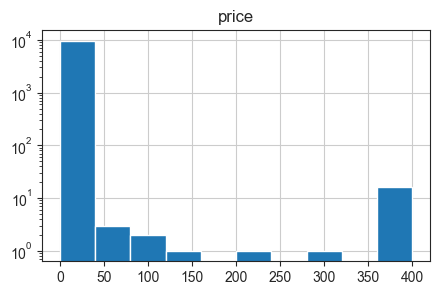

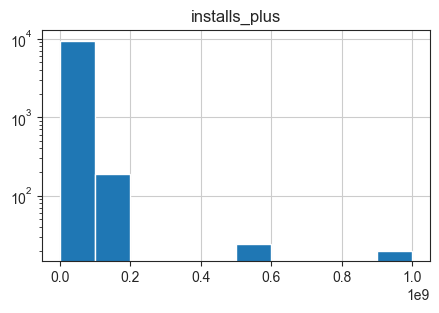

In [344]:
for col in numeric_columns:
    set_size_style(5,3,'ticks')
    google_play_data[col].hist()
    plt.yscale('log')
    plt.title(col)
    
    plt.show()

Now that the data has been cleaned and prepared, free from any unusual values, and it's ready for analysis. We can start exploring the data to uncover important insights that will help answer our questions.

In [345]:
google_play_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             9659 non-null   object        
 1   category        9659 non-null   object        
 2   rating          8196 non-null   float64       
 3   reviews         9659 non-null   int32         
 4   size            9659 non-null   object        
 5   installs_plus   9659 non-null   int32         
 6   type            9658 non-null   object        
 7   price           9659 non-null   float64       
 8   content_rating  9659 non-null   object        
 9   genres          9659 non-null   object        
 10  last_updated    9659 non-null   datetime64[ns]
 11  current_ver     9651 non-null   object        
 12  android_ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 981.0+ KB


# Research and Analysis Questions

## What are the top categories in terms of number of apps?

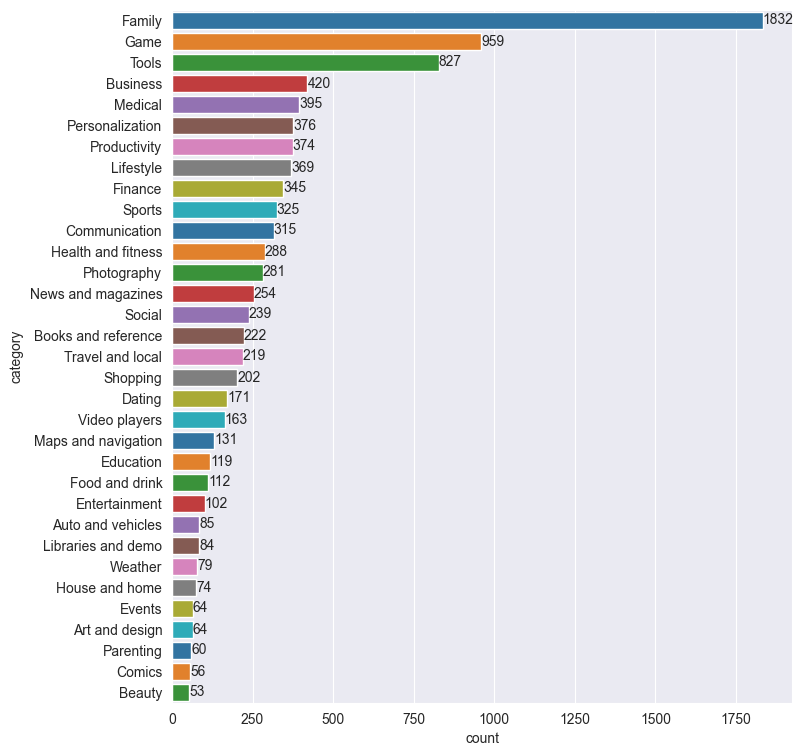

In [346]:
top_categories = google_play_data['category'].value_counts().to_frame()
set_size_style(8,9,'darkgrid')
ax = sns.barplot(data=top_categories, y='category', x='count',  hue='category', palette='tab10')

for container in ax.containers:
    ax.bar_label(container)

- Most of the Apps belongs to the Family Category in Google Play Store.
- Followed by Games, Tools and Business.

## How do the ratings vary across different categories?

In [347]:
mean_ratings = google_play_data.groupby('category')['rating'].mean().nlargest(30)
mean_ratings

category
Events                 4.435556
Education              4.364407
Art and design         4.357377
Books and reference    4.344970
Personalization        4.332215
Parenting              4.300000
Beauty                 4.278571
Game                   4.247368
Social                 4.247291
Weather                4.243056
Health and fitness     4.243033
Shopping               4.230000
Sports                 4.216154
Auto and vehicles      4.190411
Productivity           4.183389
Comics                 4.181481
Family                 4.179664
Libraries and demo     4.178125
Food and drink         4.172340
Medical                4.166552
Photography            4.157414
House and home         4.150000
Entertainment          4.135294
News and magazines     4.121569
Communication          4.121484
Finance                4.115563
Business               4.098479
Lifestyle              4.093355
Travel and local       4.069519
Video players          4.044595
Name: rating, dtype: float64

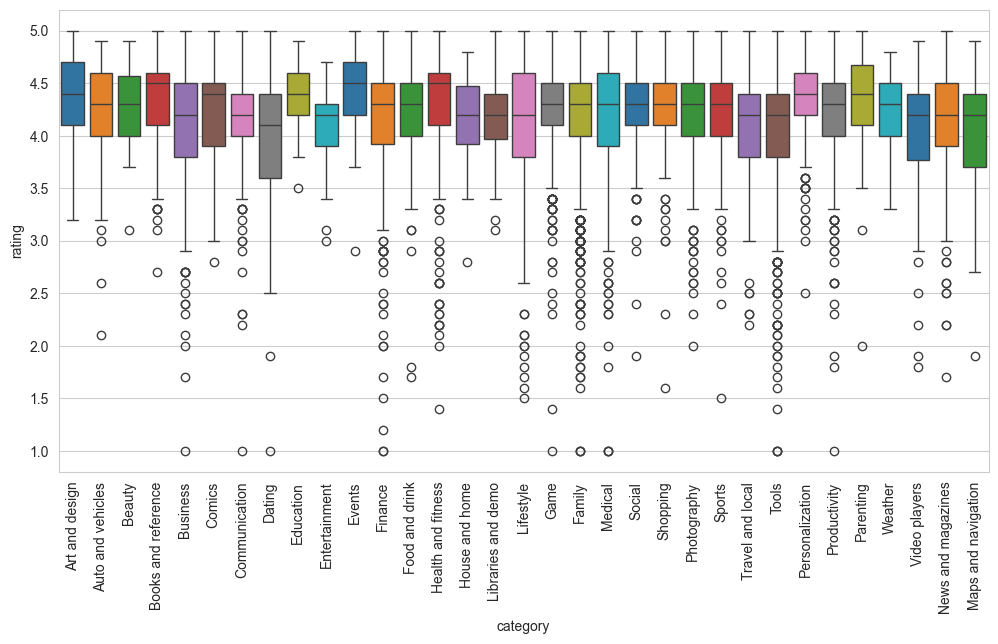

In [348]:

columns = list(mean_ratings.index)
# columns
set_size_style(12,6,'whitegrid')
ax = sns.boxplot(data=google_play_data, x='category', y='rating', hue='category', palette='tab10')
ax.tick_params('x', rotation=90)

plt.show()

- Event category has the overall highest average ratings.

## What are the most popular categories of apps on the Google Play Store?

In [349]:
google_play_data['installs_plus'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [350]:
popular_categories = google_play_data.groupby('category')['installs_plus'].sum().sort_values(ascending=False).nlargest(10).to_frame()
popular_categories

,installs_plus
category,
Game,13878924415
Communication,11038276251
Tools,8001771915
Productivity,5793091369
Social,5487867902
Photography,4649147655
Family,4427941505
Video players,3926902720
Travel and local,2894887146


In [351]:
popular_categories = round(popular_categories/1000000000,2)
popular_categories

,installs_plus
category,
Game,13.88
Communication,11.04
Tools,8.00
Productivity,5.79
Social,5.49
Photography,4.65
Family,4.43
Video players,3.93
Travel and local,2.89


<Axes: xlabel='category', ylabel='installs_plus'>

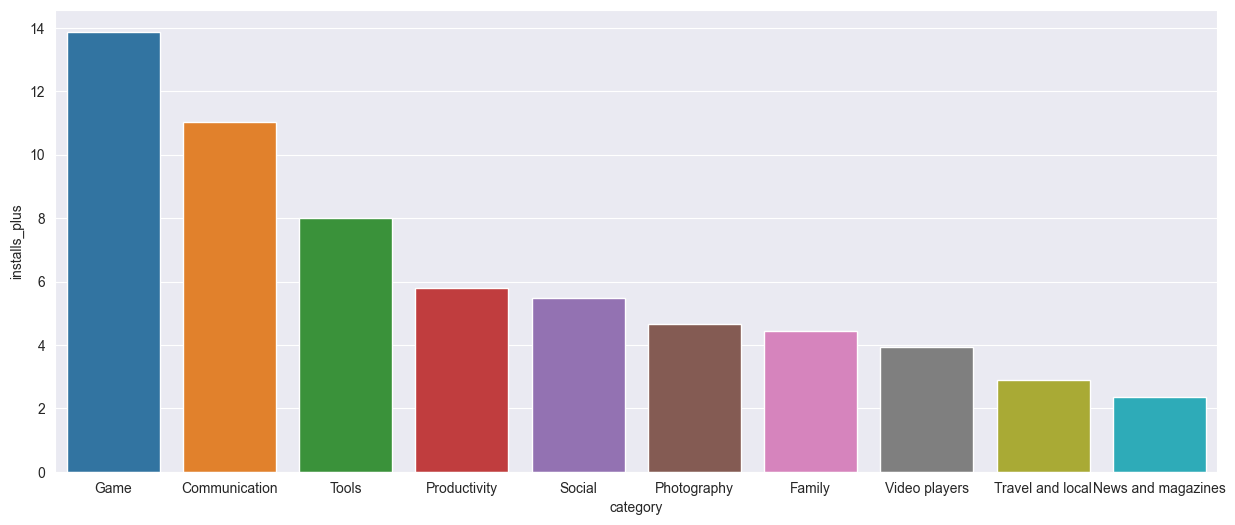

In [352]:


set_size_style(15,6,'darkgrid')
sns.barplot(data=popular_categories, x='category', y='installs_plus', hue='category')

## Can we identify niche categories with high ratings but lower number of installs?

In [353]:
google_play_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             9659 non-null   object        
 1   category        9659 non-null   object        
 2   rating          8196 non-null   float64       
 3   reviews         9659 non-null   int32         
 4   size            9659 non-null   object        
 5   installs_plus   9659 non-null   int32         
 6   type            9658 non-null   object        
 7   price           9659 non-null   float64       
 8   content_rating  9659 non-null   object        
 9   genres          9659 non-null   object        
 10  last_updated    9659 non-null   datetime64[ns]
 11  current_ver     9651 non-null   object        
 12  android_ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 981.0+ KB


In [354]:
low_competition_cat = google_play_data.groupby('category')[['rating', 'installs_plus']].agg({'rating' : 'mean', 'installs_plus' : 'sum'}).sort_values(['installs_plus', 'rating'], ascending=[True, False])
low_competition_cat['installs_plus'] = round(low_competition_cat['installs_plus']/1000000,2)
low_competition_cat

,rating,installs_plus
category,,
Events,4.435556,15.97
Beauty,4.278571,27.20
Parenting,4.300000,31.52
Medical,4.166552,38.19
Comics,4.181481,44.98
Libraries and demo,4.178125,53.00
Auto and vehicles,4.190411,53.13
House and home,4.150000,97.21
Art and design,4.357377,114.34


C:\Users\alibi\AppData\Local\Temp\ipykernel_3672\2279921360.py:2: UserWarning: 
The sizes list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(data=low_competition_cat[:10], x='rating',


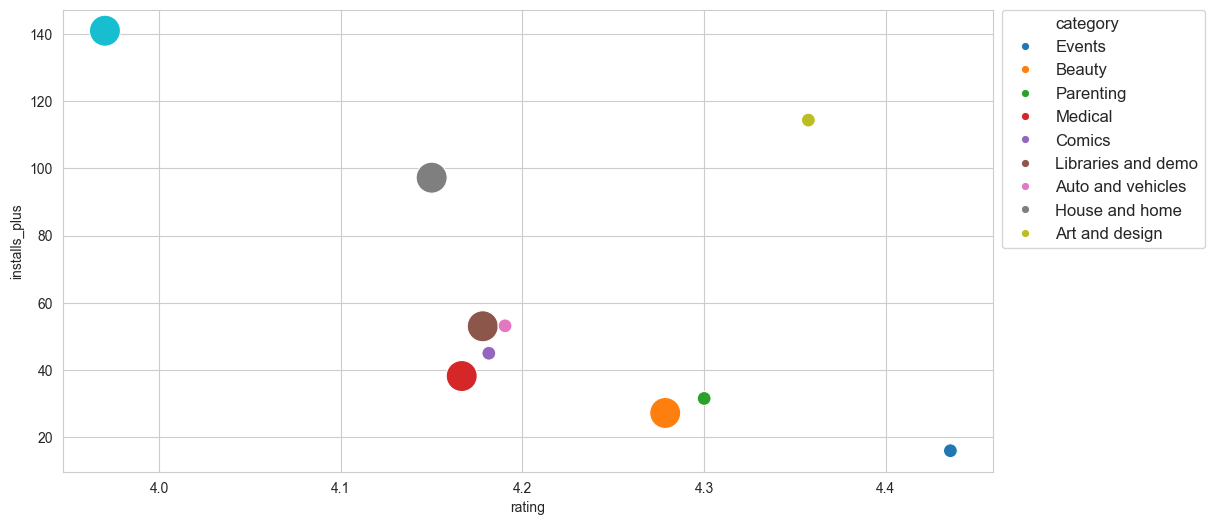

In [405]:
set_size_style(12,6,'whitegrid')
ax = sns.scatterplot(data=low_competition_cat[:10], x='rating',
                y='installs_plus', hue='category', size='installs_plus', sizes=[100,500], legend=True)

# extract the existing handles and labels
h, l = ax.get_legend_handles_labels()

# slice the appropriate section of l and h to include in the legend
ax.legend(h[0:10], l[0:10], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., fontsize=12)
plt.show()
